
#### Problem Statement: 
    To expose the best combination for strategy games available in the AppStore in order to get a good user rating (4.0/5.0 and above).
    

In [108]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
df=pd.read_csv(r"C:\Users\Somya\Documents\appstore_games.csv")

In [110]:
df.describe()

,ID,Average User Rating,User Rating Count,Price,Size
count,1.700700e+04,7561.000000,7.561000e+03,16983.000000,1.700600e+04
mean,1.059614e+09,4.060905,3.306531e+03,0.813419,1.157064e+08
std,2.999676e+08,0.751428,4.232256e+04,7.835732,2.036477e+08
min,2.849214e+08,1.000000,5.000000e+00,0.000000,5.132800e+04
25%,8.996543e+08,3.500000,1.200000e+01,0.000000,2.295014e+07
50%,1.112286e+09,4.500000,4.600000e+01,0.000000,5.676895e+07
75%,1.286983e+09,4.500000,3.090000e+02,0.000000,1.330271e+08
max,1.475077e+09,5.000000,3.032734e+06,179.990000,4.005591e+09


###### Data Cleaning

In [111]:
df.drop(['URL','ID','Icon URL','Subtitle','Description','Developer','Primary Genre'],axis=1,inplace=True)

In [112]:
df.columns

Index(['Name', 'Average User Rating', 'User Rating Count', 'Price',
       'In-app Purchases', 'Age Rating', 'Languages', 'Size', 'Genres',
       'Original Release Date', 'Current Version Release Date'],
      dtype='object')

In [113]:
df.isnull().sum()

Name                               0
Average User Rating             9446
User Rating Count               9446
Price                             24
In-app Purchases                9324
Age Rating                         0
Languages                         60
Size                               1
Genres                             0
Original Release Date              0
Current Version Release Date       0
dtype: int64

In [114]:
#Removing NULL values
df=df[pd.notnull(df['Average User Rating'])]

In [115]:
#converting date strings to date time object
df['Original Release Date']=pd.to_datetime(df['Original Release Date'])
df['Current Version Release Date']=pd.to_datetime(df['Current Version Release Date'])

In [116]:
#add column for gap between release and update
df['Update Gap']=df['Current Version Release Date'] - df['Original Release Date']

In [117]:
#remove rating less than 200 user count and update gap less than 6 months
bs=(df[df['User Rating Count'] < 200].index) & (df[df['Update Gap'] < datetime.timedelta(days=180)].index)
df.drop(bs,inplace =True)

In [118]:
#remove genre tags without meaningfull insight
df.Genres=df.Genres.str.replace('Games','').str.replace('Entertainment','').str.replace(',','')
df.Genres=df.Genres.str.split(' ').map(lambda x: ' '.join(sorted(x)))
df.Genres=df.Genres.str.strip()

In [119]:
#Remove non essential Genres
garbage=df[~df.Genres.str.contains('Puzzel') & \
         ~df.Genres.str.contains('Board') & \
         ~df.Genres.str.contains('Adventure') & \
          ~df.Genres.str.contains('Role') & \
         ~df.Genres.str.contains('Role Playing') & \
         ~df.Genres.str.contains('Action') & \
         ~df.Genres.str.contains('Family') & \
         ~df.Genres.str.contains('Education')].index
df.drop(garbage, inplace=True)

In [120]:
#Grouping strings in Genres
df.loc[df.Genres.str.contains('Puzzel'),'Genres']='Puzzel'
df.loc[df.Genres.str.contains('Board'),'Genres']='Puzzel'
df.loc[df.Genres.str.contains('Adventure'),'Genres']='Adventure'
df.loc[df.Genres.str.contains('Role'),'Genres']='Adventure'
df.loc[df.Genres.str.contains('Role Playing'),'Genres']='Adventure'
df.loc[df.Genres.str.contains('Action'),'Genres']='Action'
df.loc[df.Genres.str.contains('Family'),'Genres']='Family'
df.loc[df.Genres.str.contains('Education'),'Genres']='Family'

###### Data Visualization

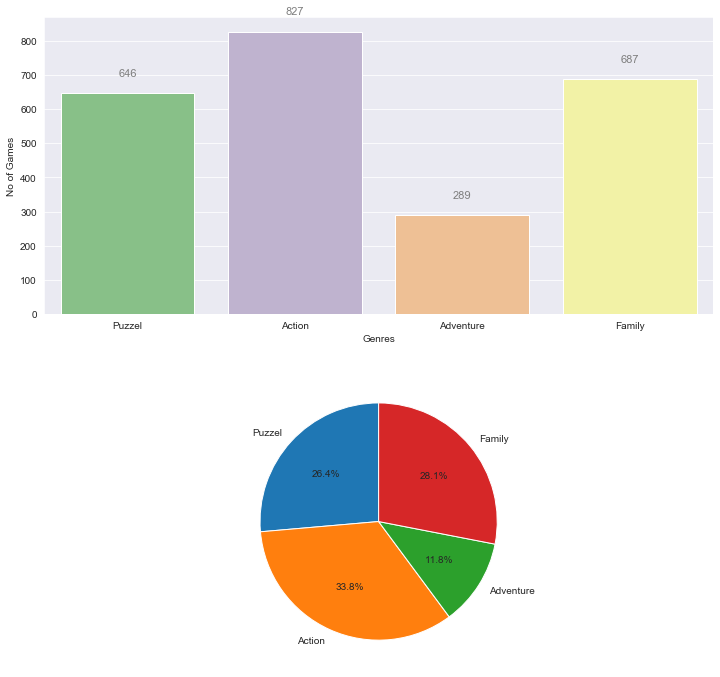

In [121]:
# Number of Games w.r.t. Types of Genres

%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
f,axes= plt.subplots(2,1,figsize=(12,12))

#Histogram
x=['Puzzel','Action','Adventure','Family']
y=[df.Genres[(df.Genres=='Puzzel')].count() ,
   df.Genres[(df.Genres=='Adventure')].count() ,
   df.Genres[(df.Genres=='Family')].count() ,
   df.Genres[(df.Genres=='Action')].count()]

graph1=sns.barplot(x,y,palette='Accent',ax=axes[0])
graph1.set(xlabel='Genres', ylabel='No of Games')
for p in graph1.patches:
    graph1.annotate("%.f" % p.get_height() , (p.get_x() + p.get_width()/2., p.get_height()) ,
                    ha='center', va='center', fontsize=11, color='gray', 
                    xytext=(0,20),textcoords='offset points')
                    
        
#PieChart
z=[df.Genres[(df.Genres=='Puzzel')].count() ,
   df.Genres[(df.Genres=='Adventure')].count() ,
   df.Genres[(df.Genres=='Family')].count() ,
   df.Genres[(df.Genres=='Action')].count()]
q=['Puzzel','Action','Adventure','Family']

plt.pie(z, labels=q, startangle=90, autopct='%.1f%%')
plt.show()
plt.ioff()

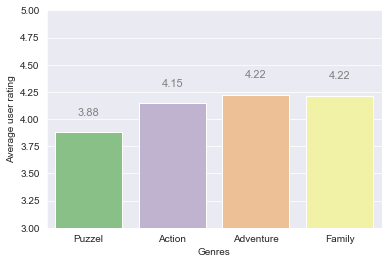

In [122]:
#Genres with higher user rating

x=['Puzzel','Action','Adventure','Family']
y=[df['Average User Rating'][(df.Genres=='Puzzel')].mean() ,
   df['Average User Rating'][(df.Genres=='Adventure')].mean() ,
   df['Average User Rating'][(df.Genres=='Family')].mean() ,
   df['Average User Rating'][(df.Genres=='Action')].mean()]

Genres_Graph=sns.barplot(x,y,palette='Accent')
Genres_Graph.set(xlabel='Genres', ylabel='Average user rating')
Genres_Graph.set(ylim=(3,5))

for p in Genres_Graph.patches:
    Genres_Graph.annotate("%.2f" % p.get_height() , (p.get_x() + p.get_width()/2., p.get_height()) ,
                    ha='center', va='center', fontsize=11, color='gray', 
                    xytext=(0,20),textcoords='offset points')
plt.ioff()

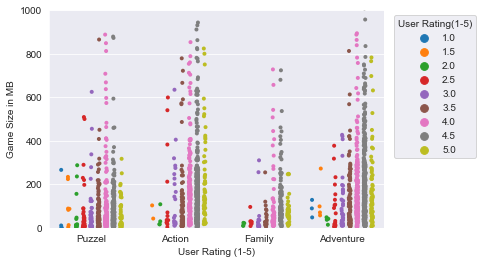

In [123]:
#Genres v/s Size of Game

df['Size2'] = round(df['Size']/1000000,1)
Size_Less_250MB = df[df.Size2 <250]
Size_More_250MB = df[(df.Size2 >=250) & (df.Size2 <1000)]
Size_More_1GB = df[df.Size2 >=1000]


vs1= sns.stripplot(y='Size2' , x='Genres', data=df,\
                hue='Average User Rating',dodge=True, size=4)

plt.legend(title='User Rating(1-5)',bbox_to_anchor=(1.29, 1))

vs1.set(ylim=(0, 1000))
vs1.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
plt.ioff()

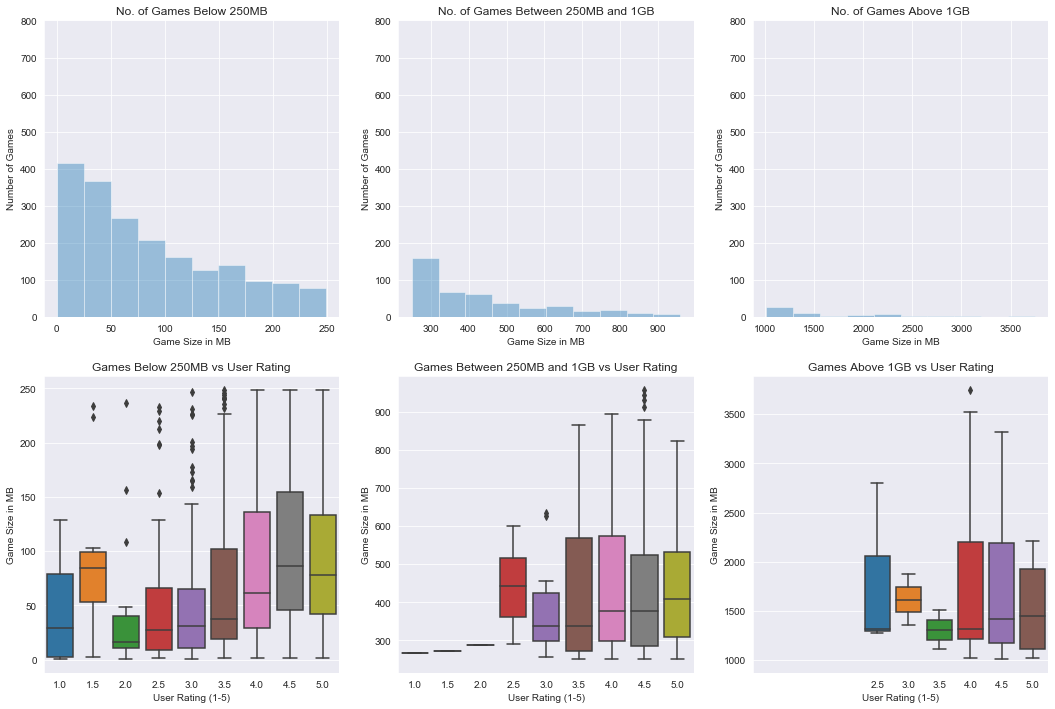

In [124]:
#Size of games v/s User Ratings

sns.set_style('darkgrid')
f, axes = plt.subplots (2,3, figsize=(18,12))



vs1 = sns.boxplot( data = Size_Less_250MB, x = 'Average User Rating', y = 'Size2',  ax=axes[1,0])
vs2 = sns.boxplot( data = Size_More_250MB, x = 'Average User Rating', y = 'Size2', ax=axes[1,1])
vs3 = sns.boxplot( data = Size_More_1GB, x = 'Average User Rating', y = 'Size2', ax=axes[1,2],)
vs4 = sns.distplot(Size_Less_250MB.Size2, bins= 10, kde=False,ax=axes[0,0])
vs5 = sns.distplot(Size_More_250MB.Size2, bins= 10, kde=False,ax=axes[0,1])
vs6 = sns.distplot(Size_More_1GB.Size2, bins= 10, kde=False,ax=axes[0,2])

vs1.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
vs2.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
vs3.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
vs4.set(xlabel='Game Size in MB',ylabel='Number of Games')
vs5.set(xlabel='Game Size in MB',ylabel='Number of Games')
vs6.set(xlabel='Game Size in MB',ylabel='Number of Games')

axes[0, 0].set_title('No. of Games Below 250MB')
axes[0, 1].set_title('No. of Games Between 250MB and 1GB')
axes[0, 2].set_title('No. of Games Above 1GB')
axes[1, 0].set_title('Games Below 250MB vs User Rating')
axes[1, 1].set_title('Games Between 250MB and 1GB vs User Rating')
axes[1, 2].set_title('Games Above 1GB vs User Rating')
vs3.set(xlim=(-4, 5.5))

vs4.set(ylim=(0, 800))
vs5.set(ylim=(0, 800))
vs6.set(ylim=(0, 800))

plt.ioff()

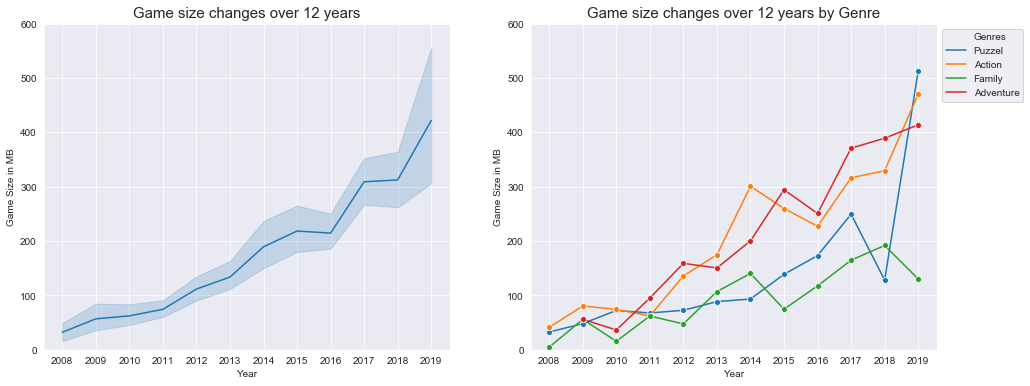

In [125]:
# Variation in size of Game

df['Year'] = df['Original Release Date']
df['Year']=df['Year'].astype(str)
#extract year ony
for i in (list(df.index.values)):
    df['Year'][i]=df['Year'][i][:4]
    
g, axes = plt.subplots (1,2, figsize=(16,6))

vs1 = sns.lineplot(x=df.Year, y=df.Size2, data=df, ax=axes[0])
vs1.set(ylim=(0, 600))
vs2 = sns.lineplot(x=df.Year, y=df.Size2, hue=df.Genres, err_style=None, marker='o',ax=axes[1])
vs2.set(ylim=(0, 600))
plt.legend(bbox_to_anchor=(1, 1))

axes[0].set_title('Game size changes over 12 years',fontsize=15)
axes[1].set_title('Game size changes over 12 years by Genre',fontsize=15)

vs1.set(xlabel='Year',ylabel='Game Size in MB')
vs2.set(xlabel='Year',ylabel='Game Size in MB')

plt.ioff()

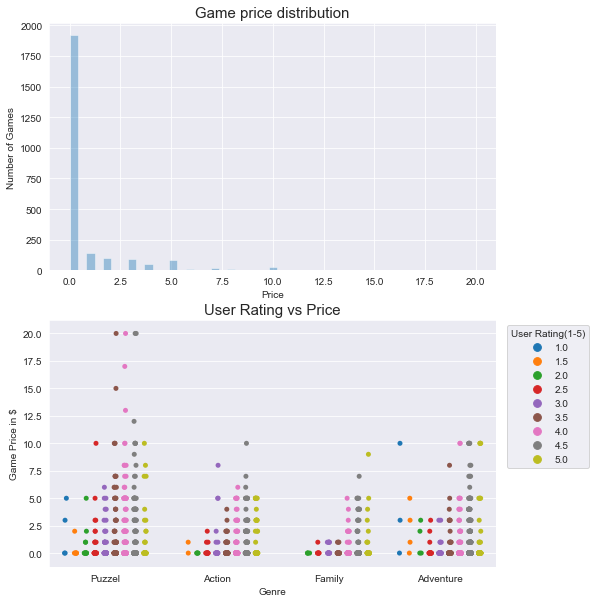

In [126]:
# Average User Rating v/s Price

h, axes = plt.subplots (2,1, figsize=(8,10))

vs1 = sns.distplot(df.Price,kde=None,ax=axes[0])
vs2 = sns.stripplot(y=df.Price, x=df.Genres, data=df,ax=axes[1],hue=df['Average User Rating'], dodge=1)

vs1.set(xlabel='Price',ylabel='Number of Games')
vs2.set(xlabel='Genre',ylabel='Game Price in $')

axes[0].set_title('Game price distribution',fontsize=15)
axes[1].set_title('User Rating vs Price',fontsize=15)
plt.legend(title='User Rating(1-5)',bbox_to_anchor=(1.22, 1))

plt.ioff()

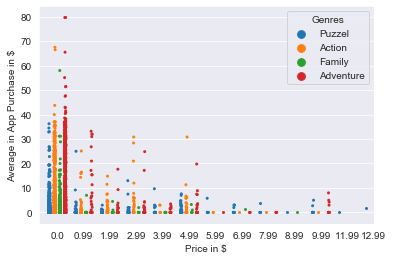

In [127]:
# In-app purchase v/s Price

a2=df.copy()
import statistics
a2['In-app Purchases'] = a2['In-app Purchases'].str.replace(',', '') 
a2['In-app Purchases']=a2['In-app Purchases'].fillna(0)

for i in (list(a2.index.values)):
    if a2['In-app Purchases'][i] ==0:
        a2['In-app Purchases'][i]=0.01
    elif a2['In-app Purchases'][i] !=0:
        A=str.split(a2['In-app Purchases'][i])
        A=[float(i) for i in A]
        a2['In-app Purchases'][i]=statistics.mean(A)
vs1= sns.stripplot(y=a2['In-app Purchases'] , x=a2.Price, data=a2, hue=a2.Genres, dodge=True, size=3)

vs1.set(xlabel='Price in $',ylabel='Average in App Purchase in $')
vs1.set(xlim=(-0.7, 12))
plt.ioff()

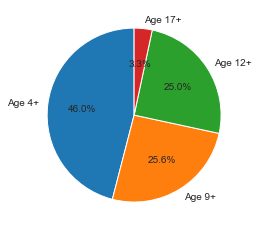

In [128]:
# Age rating

NAR = [a2['Age Rating'][(a2['Age Rating']=='4+')].count(),a2['Age Rating'][(a2['Age Rating']=='9+')].count(),\
     a2['Age Rating'][(a2['Age Rating']=='12+')].count(),a2['Age Rating'][(a2['Age Rating']=='17+')].count()]
AR = ['Age 4+','Age 9+','Age 12+','Age 17+']

plt.pie(NAR, labels=AR, startangle=90, autopct='%.1f%%')
plt.show()


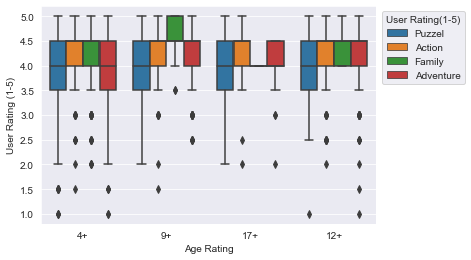

In [129]:
# Age Rating v/s User Rating

vs1 = sns.boxplot(x=a2['Age Rating'], y=df['Average User Rating'], data=df, hue=df.Genres, dodge=True)

vs1.set(xlabel='Age Rating',ylabel='User Rating (1-5)')
plt.legend(title='User Rating(1-5)',bbox_to_anchor=(1.28, 1))
plt.ioff()

### Inferences 

###### Genre grouping  
* Puzzel has lowest average rating as compared to other genres.  
* Action & Adventure Genre games above 600MB have more tendency to achieve rating 4.0 and above.  
* Family Games size less than 200MB has low ratings
###### Game Size Analysis  
* Games below 250MB -> focus on size between 100MB to 150MB of contents.  
* Games between 250MB to 1GB -> focus on size between 500MB+ of contents. 

###### Release Date/ Update Factor  
* Almost 90% of the developers focuses on games below 1 Dollar and places In-App Purchase as their strategy for income

###### Game price and In-App Purchase Factor  
* A large number of Developers create free games.  
* Puzzel shows more no. of paid players compare to others.  

###### Age Rating Factor  
*Games with age rating 12+ are more popular.






